In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline #과거 주피터 노트북 시각화를 위해 설정


In [4]:
df = pd.read_csv("data/diabetes.csv")

df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
split_count = int(df.shape[0]*0.8)
split_count

614

In [8]:
train = df[:split_count].copy()

train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [10]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [11]:
feature_names = train.columns[:-1].tolist() #마지막 컬럼 전까지 받아오기, 학습, 예측에 사용할 컬럼

feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [12]:
#정답이자 예측해야 될 값
label_name = train.columns[-1]
label_name

'Outcome'

In [15]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()


(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
X_test = test[feature_names]
y_test = test[label_name]

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

트리 알고리즘 분석
트리 시각화


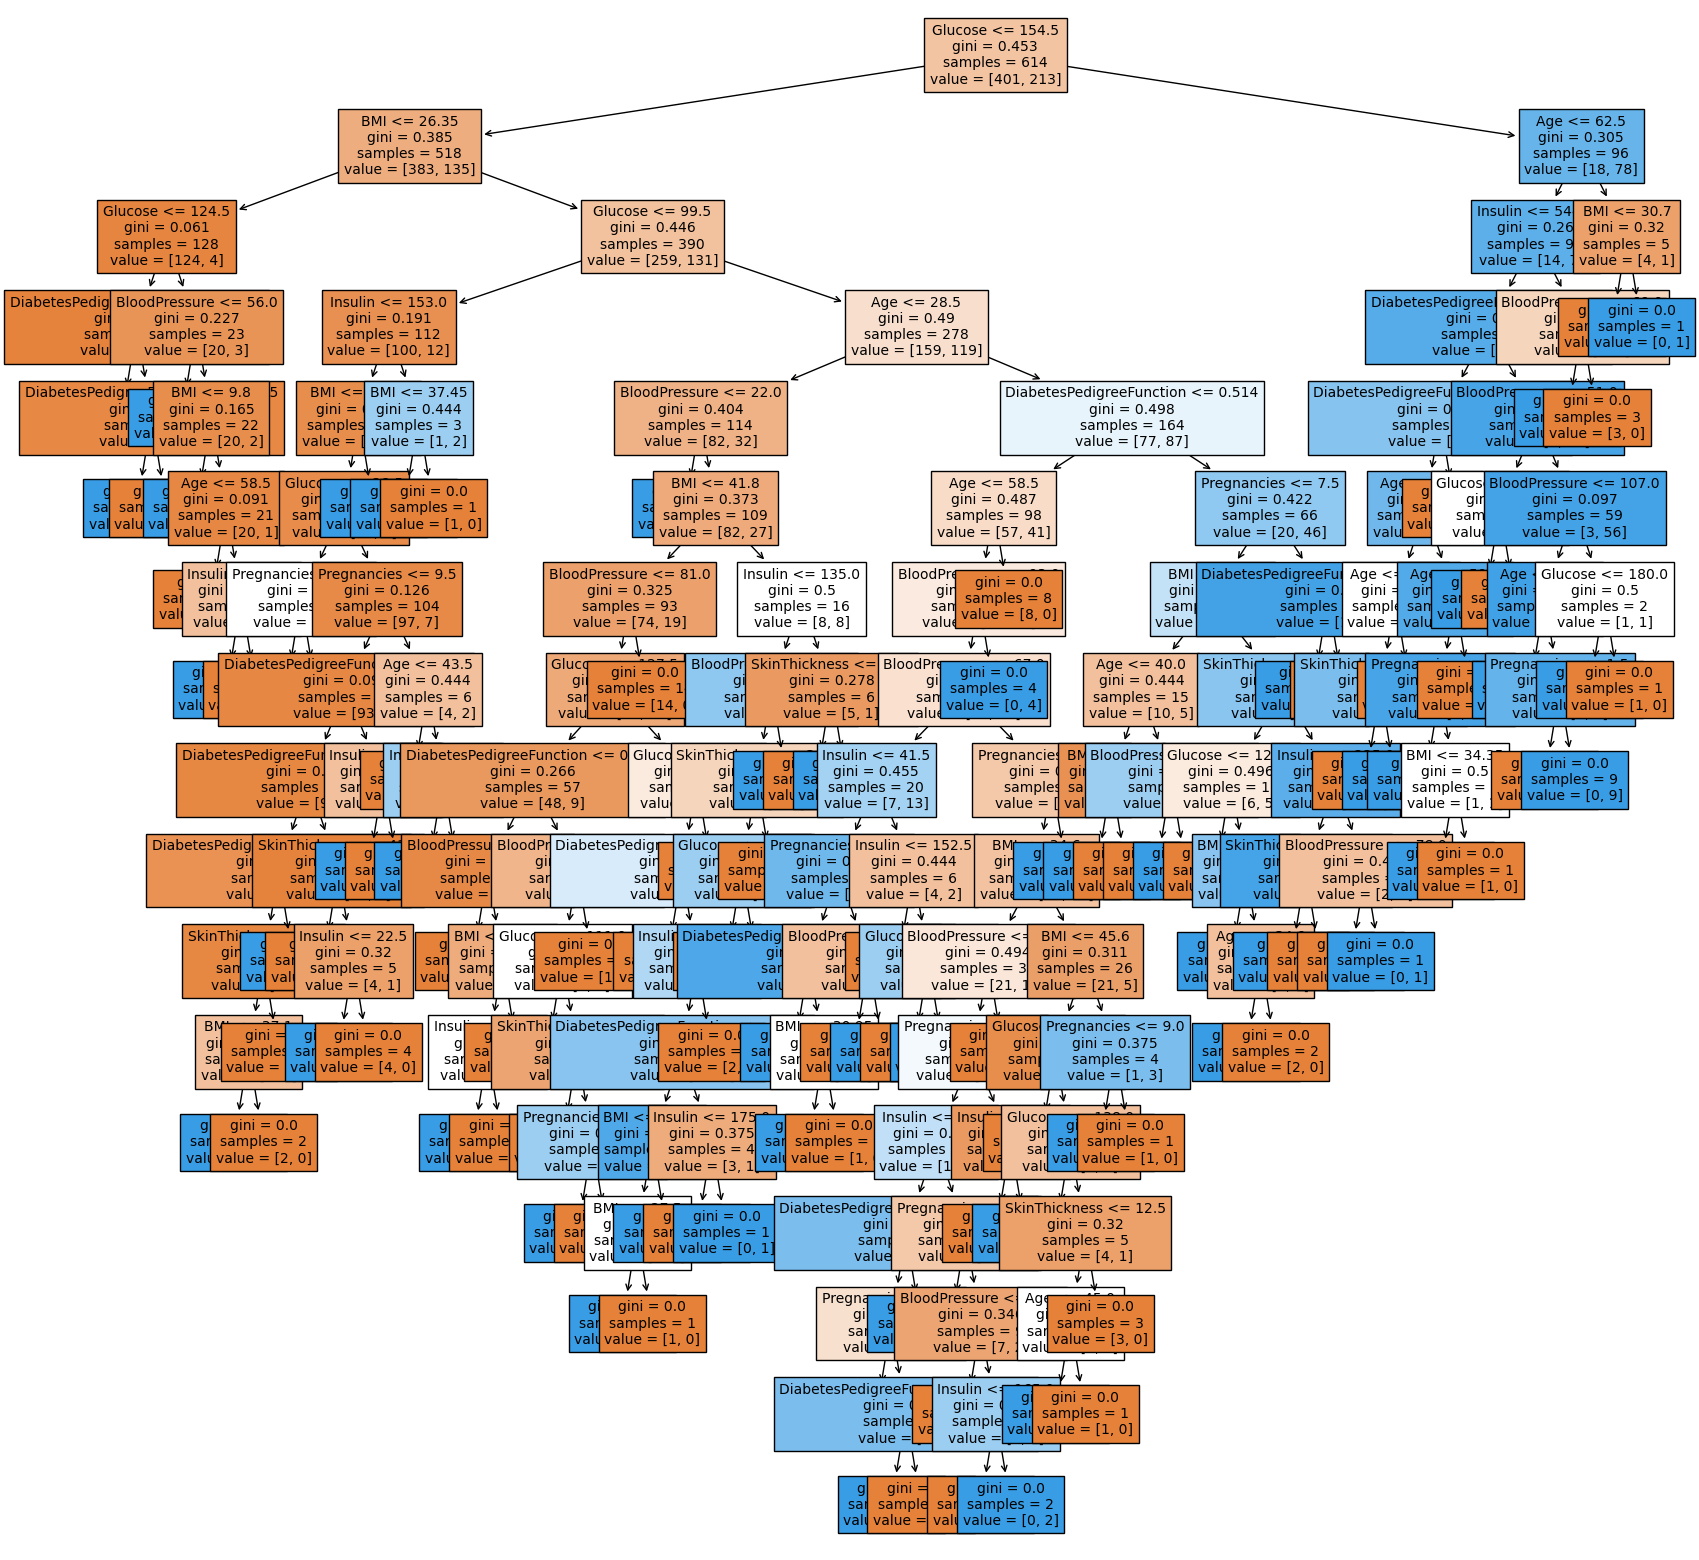

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model, feature_names=feature_names,filled=True,fontsize=10)

In [27]:
model.feature_importances_

array([0.08079797, 0.3083058 , 0.11599811, 0.04192482, 0.0968241 ,
       0.15762184, 0.10184949, 0.09667786])

<Axes: >

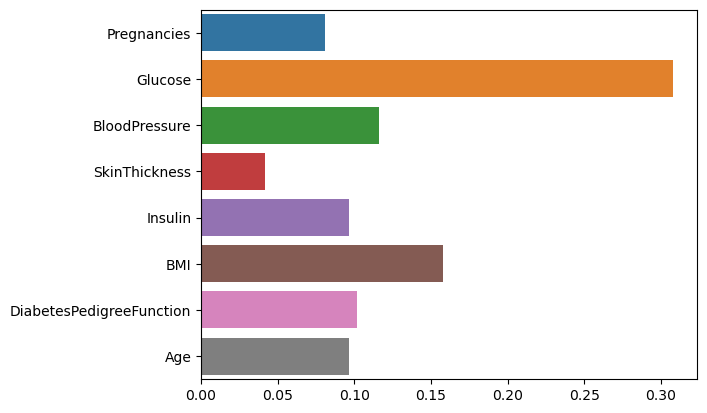

In [28]:
sns.barplot(x=model.feature_importances_,y=feature_names)

정확도

In [30]:
diff_count = abs(y_test-y_predict).sum()

diff_count

44

In [32]:
abs(y_test - y_predict).sum() /len(y_test)

0.2857142857142857

In [34]:
(len(y_test)-diff_count) / len(y_test)*100

71.42857142857143

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.7142857142857143

In [36]:
model.score(X_test,y_test)*100

71.42857142857143